In [11]:
!pip install pandas numpy scikit-learn matplotlib

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Creating a synthetic dataset
date_rng = pd.date_range(start='2020-01-01', end='2023-01-01', freq='M')
np.random.seed(0)
sales = np.random.randint(100, 500, size=(len(date_rng)))

# Create a DataFrame
df = pd.DataFrame(date_rng, columns=['date'])
df['sales'] = sales
df.set_index('date', inplace=True)

# Display the first few rows
df.head()

,sales
date,
2020-01-31,272
2020-02-29,147
2020-03-31,217
2020-04-30,292
2020-05-31,423


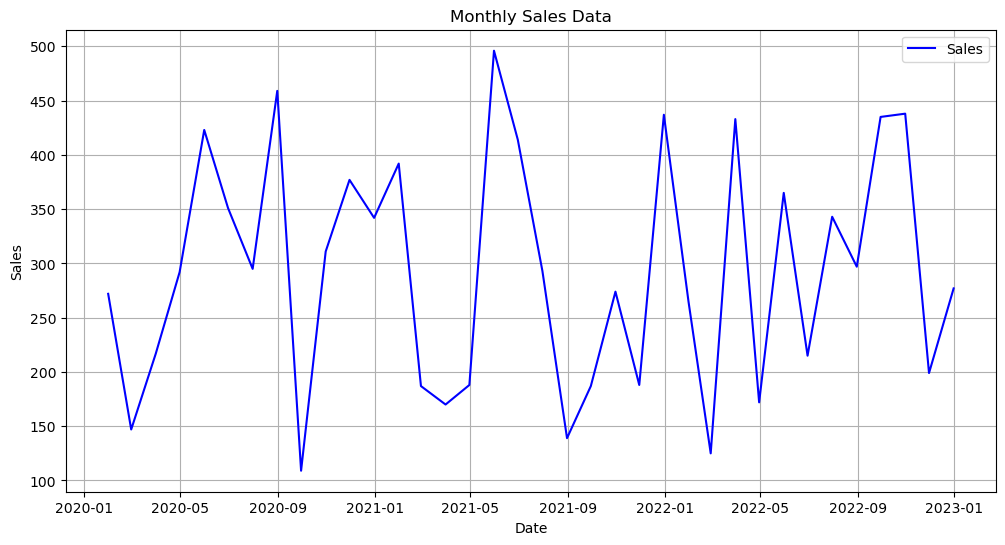

In [14]:
# Plotting the sales data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'], label='Sales', color='blue')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

In [15]:
# Create new features: month and year
df['month'] = df.index.month
df['year'] = df.index.year

# Display the updated DataFrame
df.head()

,sales,month,year
date,,,
2020-01-31,272,1,2020
2020-02-29,147,2,2020
2020-03-31,217,3,2020
2020-04-30,292,4,2020
2020-05-31,423,5,2020


In [16]:
# Define features and target
X = df[['month', 'year']]
y = df['sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [17]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
# Make predictions
y_pred = model.predict(X_test)


In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 11934.17
R-squared: -0.07


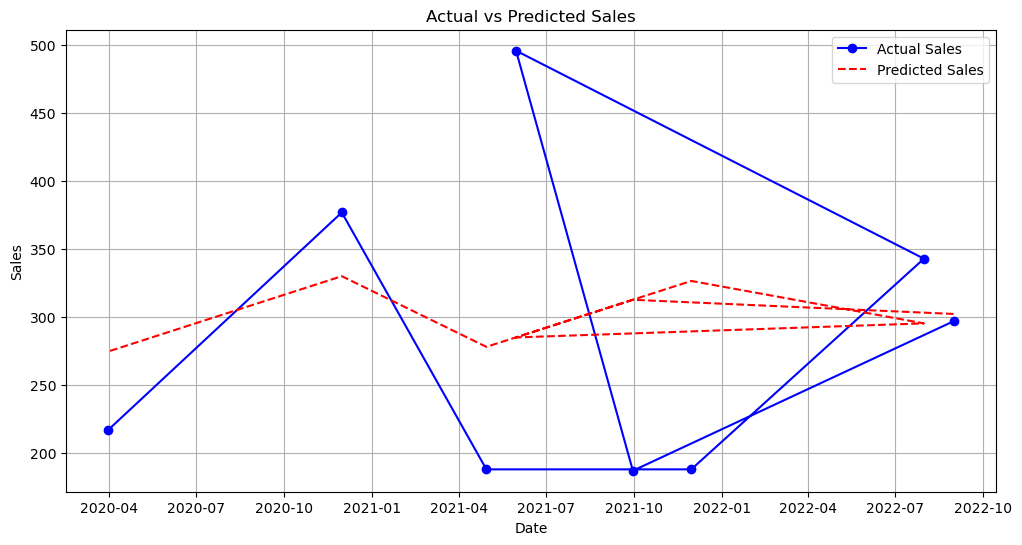

In [20]:
# Plotting actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='blue', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


In [21]:
import joblib

# Save the model
joblib.dump(model, 'sales_forecasting_model.pkl')


['sales_forecasting_model.pkl']